In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def plot_indicators(df, price_col="price", timestamp_col="timestamp", start=None, end=None):
    """
    Рисует 4 панели: цена, RSI, MACD, Bollinger Bandwidth / Volatility.
    """
    plot_df = df.copy()
    if timestamp_col in df.columns:
        plot_df[timestamp_col] = pd.to_datetime(plot_df[timestamp_col])
    if start or end:
        plot_df = plot_df.loc[start:end]

    fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

    # Цена
    axs[0].plot(plot_df[timestamp_col], plot_df[price_col], label="Price")
    axs[0].set_ylabel("Price")
    axs[0].legend()
    axs[0].grid(True)

    # RSI
    axs[1].plot(plot_df[timestamp_col], plot_df["rsi"], label="RSI", color="purple")
    axs[1].axhline(70, color="red", linestyle="--", linewidth=0.8)
    axs[1].axhline(30, color="green", linestyle="--", linewidth=0.8)
    axs[1].set_ylabel("RSI")
    axs[1].legend()
    axs[1].grid(True)

    # MACD
    axs[2].plot(plot_df[timestamp_col], plot_df["macd"], label="MACD", color="orange")
    axs[2].axhline(0, color="black", linestyle="--", linewidth=0.8)
    axs[2].set_ylabel("MACD diff")
    axs[2].legend()
    axs[2].grid(True)

    # Волатильность
    axs[3].plot(plot_df[timestamp_col], plot_df["bb_width"], label="BB Width", color="blue")
    axs[3].plot(plot_df[timestamp_col], plot_df["volatility"], label="Rolling Volatility", color="gray", alpha=0.6)
    axs[3].set_ylabel("Volatility")
    axs[3].legend()
    axs[3].grid(True)

    plt.xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

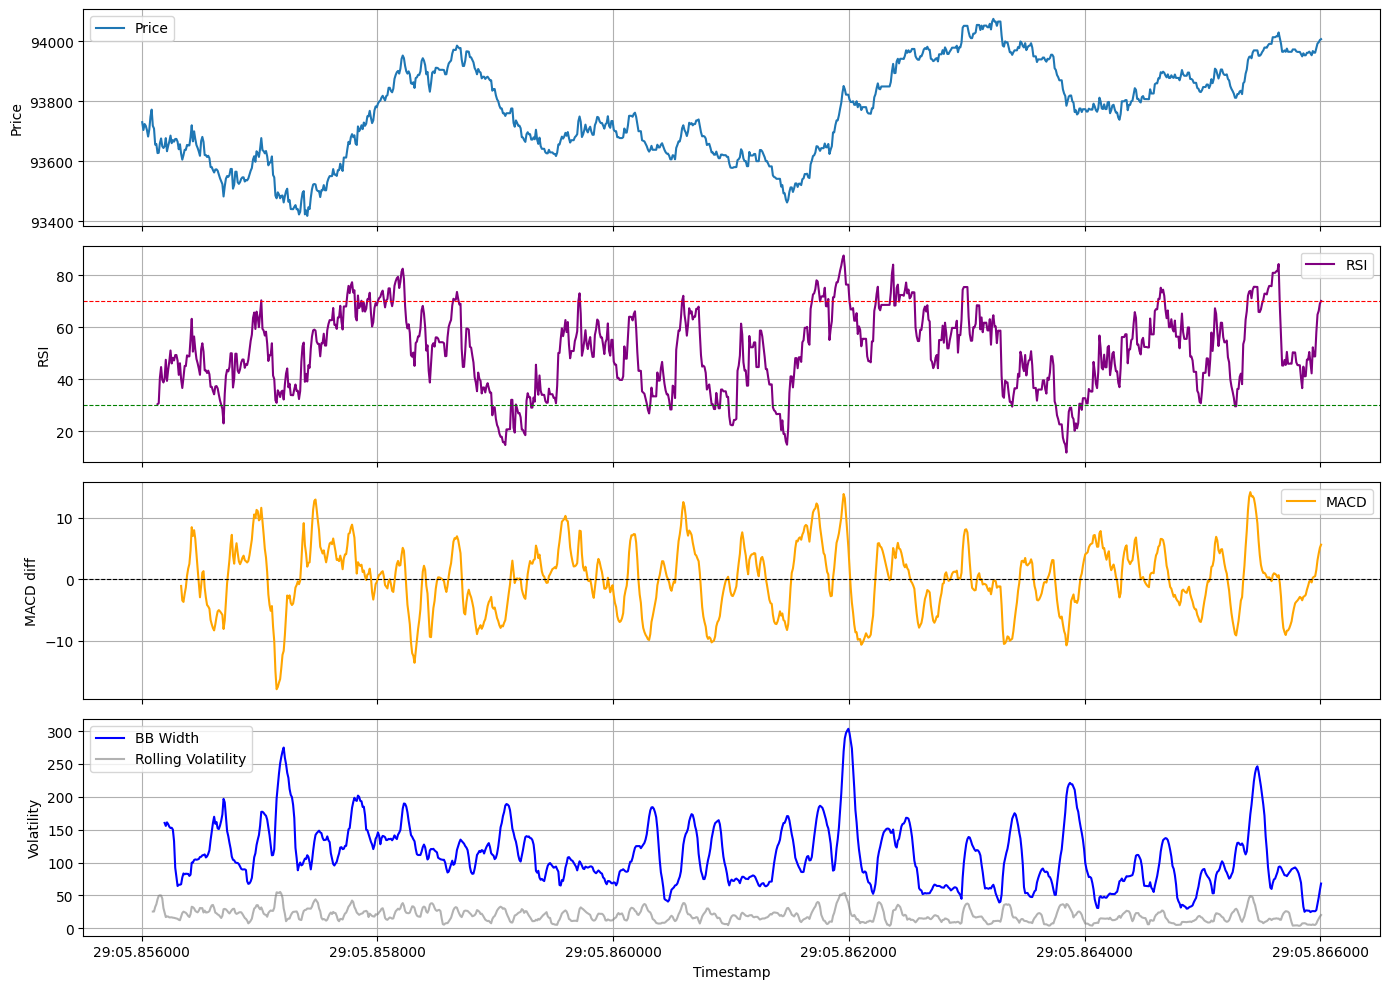

In [10]:
price_df = pd.read_csv("../data/prices/BTC_10000ms.csv")
indicator_df = pd.read_csv("../data/indicators/BTC_10000ms.csv")

df = pd.concat([price_df, indicator_df], axis=1)
plot_indicators(df, start=0, end=1000)